## SOCIAL NETWORK ANALYSIS WITH NETWORKX

#### Candidate: 
Fratarcangeli Silvia

Analysis of the Facebook network of public figures and gephi visualization.

@inproceedings{nr-aaai15,
     title = {The Network Data Repository with Interactive Graph Analytics and Visualization},
     author={Ryan A. Rossi and Nesreen K. Ahmed},
     booktitle = {AAAI},
     url={http://networkrepository.com},
     year={2015}
  }

#### Libraries

In [ ]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import operator as op
import matplotlib.lines as mlines

### Graph creation: facebook network of public figures vs Erdos-Renyi random network

In [ ]:
fb_g = nx.Graph() 

In [ ]:
with open("/content/fb-pages-public-figure.edges.csv") as f:
    f.readline()
    for line in f:
        a, b = line.strip().split(',')
        fb_g.add_edge(int(a),int(b))
print('Number of nodes: {}'.format(fb_g.order()))
print('Number of links: {}'.format(fb_g.size()))

Number of nodes: 11565
Number of links: 67113


In [ ]:
num= (2*67113)
den = 11565*11564
p= num/den
p #density

0.0010036514770783338

In [ ]:
random = nx.erdos_renyi_graph(n=11565,p=p, seed= 123, directed=False)

In [ ]:
nx.write_gexf(random, "test.gexf")  #for gephi visualization of the random network

### Analysis

Hint: Study flow of fake news, which node or hub of nodes I will have to tackle in order to maximize the spread of cascade.


### Degree Analysis


In an undirected network, the degree represent the number of links of a node.

Average degree = average number of links per node (local property) -> it depends on N (number of nodes in the network) and on L (number of links).

Density = fraction of all possible links that are actually present (2L/N(N-1)) --> avg degree/N-1.

Degree is related to a single node, density referes to the whole network.

In [ ]:
fb_degree = nx.degree(fb_g)
fb_graph_degree_list = list(dict(fb_degree).values())
print('Average Degree:', np.mean(fb_graph_degree_list))  
print('Median Degree:', np.median(fb_graph_degree_list))
print('Standard Deviation Degree:', np.std(fb_graph_degree_list))
print('Min: {}'.format(np.min(fb_graph_degree_list)))
print('Max: {}'.format(np.max(fb_graph_degree_list)))

Average Degree: 11.606225680933852
Median Degree: 5.0
Standard Deviation Degree: 21.28420240677589
Min: 1
Max: 326


In [ ]:
er_degree= nx.degree(random)
er_graph_degree_list = list(dict(er_degree).values())
print('Average Degree:', np.mean(er_graph_degree_list))  
print('Median Degree:', np.median(er_graph_degree_list))
print('Standard Deviation Degree:', np.std(er_graph_degree_list))
print('Min: {}'.format(np.min(er_graph_degree_list)))
print('Max: {}'.format(np.max(er_graph_degree_list)))

Average Degree: 11.573194984868136
Median Degree: 11.0
Standard Deviation Degree: 3.3965890477253007
Min: 1
Max: 26


In [ ]:
fb_density = nx.density(fb_g)
print('Density: ', fb_density)

Density:  0.0010036514770783338


Note that average degree depends on the number of links (L) and nodes (N) in the network. 

This is why, in order to understand how nodes are connected to each other, we need to compute the 
density of the network (a global property).

As we already know from the real world example, real network are usually very sparse. 
  
  Following Metcalfe's law, while all links are possible(denominator of the density formula), not all links are present in real networks.
  
  When a network is sparse, it means that above all the possible links that can be present in the network, only few of them are actually real.
  
  On the other hand, it is also known that graphs (real network) densify overtime.

As we can see from the visualization of the social network in gephi, we have only one giant connected component as 
each node in the graph can be reached by the others through an existing path.

### Degree Distribution plottings

By plotting the degree distribution of the network, we can see from the graph if we are dealing with a scale free network.

Graph: probability that a certain node has a certain degree (number of connection). (See whether we can use frequency instead of probability.)

Hubs are nodes with a high degree.

Scale free network implies that in real networks hubs are naturally present, with some nodes presenting a higher degree.

These nodes can be seen as "influencer" and create hubs of other nodes which are linked to them.

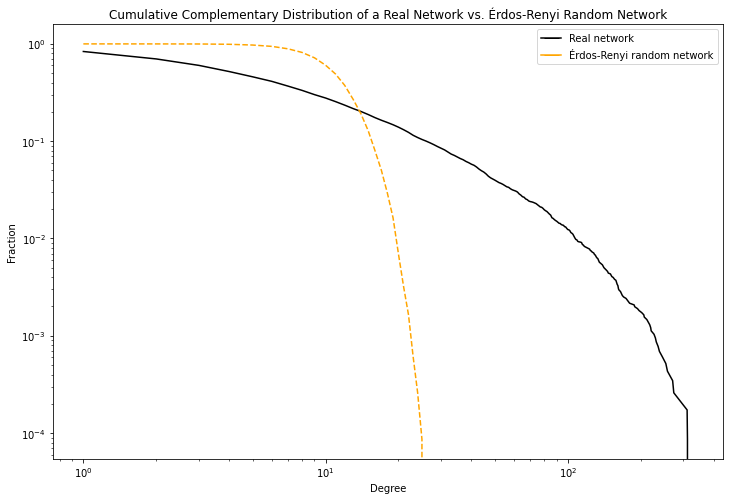

In [ ]:
## verify whether your real network is random or not --> hubs are present (nodes with high degree)
cdf_fb= ECDF(fb_graph_degree_list) 
fb_x= np.unique(fb_graph_degree_list)
fb_y=cdf_fb(fb_x)                                    # real network degree distirbution

cdf_er= ECDF(er_graph_degree_list) # random network degree distribution
er_x=np.unique(er_graph_degree_list)
er_y=cdf_er(er_x)

#plot ccdf graph vs ccdf random graph (verifica se random o no: hubs are naturally present in real network)
fig_cdf_fb = plt.figure(figsize=(12,8))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(fb_x,1-fb_y,marker='None',ms=8, linestyle='-',color = 'black')
axes.loglog(er_x,1-er_y,marker='None',ms=10, linestyle='--', color = 'orange')
axes.set_xlabel('Degree',size=10)
axes.set_ylabel('Fraction', size = 10)
axes.set_title('Cumulative Complementary Distribution of a Real Network vs. Érdos-Renyi Random Network')

line_er= mlines.Line2D([],[], color= 'orange', marker = '_', markersize=15, label='Érdos-Renyi random network')
line_fb= mlines.Line2D([],[], color= 'black', marker = '_', markersize=15, label='Real network')
plt.legend(handles=[line_fb, line_er])

In a random networks all vertices are alike, while real networks are characterized by a small number of vertices 
with very large degree while most vertices maintain a very low degree.

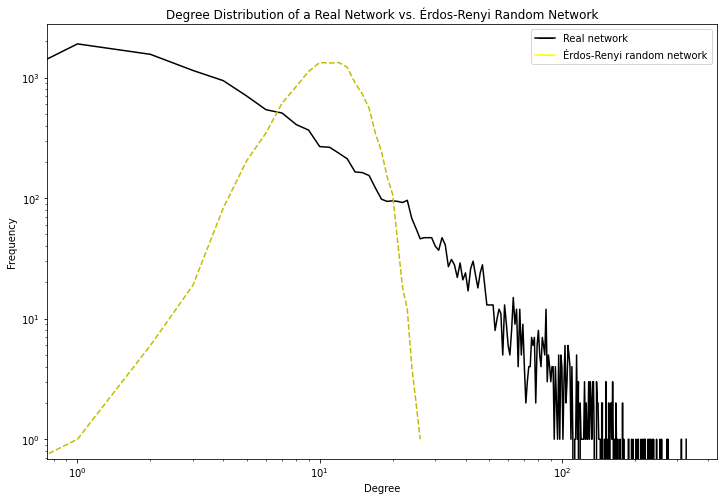

In [ ]:
## cdf
degree_freq_fb = nx.degree_histogram(fb_g)
degrees = range(len(degree_freq_fb))
degree_freq_er = nx.degree_histogram(random)
degrees_random= range(len(degree_freq_er))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees, degree_freq_fb,'k-') 
plt.loglog(degrees_random, degree_freq_er, 'y--')

plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of a Real Network vs. Érdos-Renyi Random Network')

line_er= mlines.Line2D([],[], color= 'yellow', marker = '_', markersize=15, label='Érdos-Renyi random network')
line_fb= mlines.Line2D([],[], color= 'black', marker = '_', markersize=15, label='Real network')
plt.legend(handles=[line_fb, line_er])

In [ ]:
pip install powerlaw

Note: you may need to restart the kernel to use updated packages.


#### Power law fitting to check for scale free network

/opt/anaconda3/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/opt/anaconda3/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


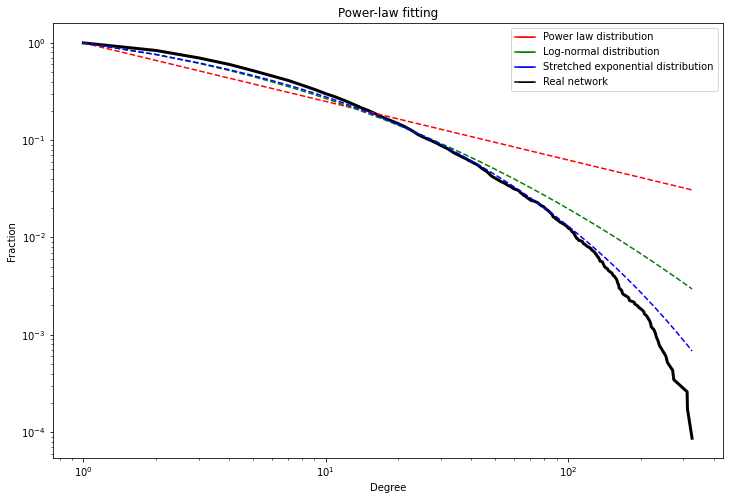

In [ ]:
#power law fit (red line) 
import powerlaw
degree_sequence = sorted([d for n, d in fb_g.degree()], reverse=True) 
fit = powerlaw.Fit(degree_sequence, xmin=1)

plt.figure(figsize=(12, 8))
fit.distribution_compare('power_law', 'lognormal')
fig4 = fit.plot_ccdf(linewidth=3, color='black')            #ccdf real network
fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--') #powerlaw
fit.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--') #lognormal
fit.stretched_exponential.plot_ccdf(ax=fig4, color='b', linestyle='--') #stretched_exponential (not scale-free)

plt.xlabel('Degree')
plt.ylabel('Fraction')
plt.title('Power-law fitting')


line_pl= mlines.Line2D([],[], color= 'red', marker = '_', markersize=15, label='Power law distribution')
line_logn= mlines.Line2D([],[], color= 'green', marker = '_', markersize=15, label='Log-normal distribution')
line_se= mlines.Line2D([],[], color= 'blue', marker = '_', markersize=15, label='Stretched exponential distribution')
line_fb= mlines.Line2D([],[], color= 'black', marker = '_', markersize=15, label='Real network')

plt.legend(handles=[line_pl, line_logn,line_se,line_fb])

The main difference with random network is that the latter is characterized by a Poisson degree distribution, 
in contrast to power-law distribution as seen in real networks (that are scale free network).

### Centrality Measures

#### Degree Centrality

In [ ]:
degree_centr = nx.degree_centrality(fb_g)
degree_one= dict([(key, value) for key, value in degree_centr.items()])
degree_nodes = sorted(degree_one.items(), key=op.itemgetter(1), reverse= True)
print('Degree Centrality:', pd.DataFrame(degree_nodes[0:11]))

Degree Centrality:        0         1
0   9429  0.028191
1   4093  0.026980
2   6978  0.026894
3   9690  0.023694
4   1011  0.023435
5   5638  0.022311
6   3120  0.021965
7   6400  0.021273
8   3403  0.020668
9   6411  0.020408
10  2099  0.020062


#### Betweenness Centrality, Closeness Centrality 
These are called geometric centralities as they rely on the concept of degree = number of connected nodes, or distance measures.

In [ ]:
betwn_centr = nx.betweenness_centrality(fb_g)

In [ ]:
betw_one = dict([(key, value) for key, value in betwn_centr.items()])
betw_nodes = sorted(betw_one.items(), key=op.itemgetter(1), reverse= True)
print('Betweennes Centrality Rank: ', pd.DataFrame(betw_nodes[0:11]))

NameError: name 'betwn_centr' is not defined

Betweenness centrality to study the extent to which a node lies between others (thus having control over information flows).

We assume that all pairs of nodes exchange the same amount of information + all information flows on the shortest path.

Closeness centrality is based on the idea that most influential nodes are reached and can reach other nodes with 
smaller paths with respect to the average length (small values for more central nodes).

In [ ]:
closeness_centr = nx.closeness_centrality(fb_g)

In [ ]:
close_one = dict([(key, value) for key, value in closeness_centr.items()])
close_nodes = sorted(close_one.items(), key=op.itemgetter(1), reverse= True)
print('Closeness Centrality Rank: ', pd.DataFrame(close_nodes[0:11]))

Betweennes Centrality Rank:         0         1
0   9785  0.159044
1  11557  0.150089
2  11362  0.147062
3  10281  0.146122
4   9429  0.144859
5  11301  0.143365
6  11185  0.140831
7  11520  0.138544
8  11115  0.138472
9  10813  0.134939


#### Eigenvector Centrality

In [ ]:
eigen_centr = nx.eigenvector_centrality(fb_g)

In [ ]:
eigen_one = dict([(key, value) for key, value in eigen_centr.items()])
eigen_nodes = sorted(eigen_one.items(), key=op.itemgetter(1), reverse= True)
print('Eigentvector Centrality Rank: ', pd.DataFrame(eigen_nodes[0:11]))

Eigentvector Centrality Rank:         0         1
0   6400  0.120936
1   5638  0.116012
2   2099  0.115591
3   7912  0.115561
4   3403  0.115088
5   3397  0.111311
6   9690  0.109825
7   8342  0.109468
8  10168  0.108493
9    491  0.104556


#### PageRank
PageRank algorithm in order to find nodes (public figures on Facebook) with a high probability to be "visited" (aka
the most connected in the network).

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links.It was originally designed as an algorithm to rank web pages.


In [ ]:
page_rank = nx.pagerank(fb_g, alpha= 0.85)
ranking = dict([(key, value) for key, value in page_rank.items()])
ranking_nodes = sorted(ranking.items(), key=op.itemgetter(1), reverse= True)
print('Nodes Ranking PageRank: ', pd.DataFrame(ranking_nodes[0:11])) #descending order by value

Nodes Ranking PageRank:         0         1
0   6978  0.002466
1   9429  0.002402
2   1011  0.001953
3   3120  0.001829
4   8293  0.001648
5   9785  0.001644
6     98  0.001489
7     57  0.001450
8   8169  0.001418
9   2127  0.001351
10  6065  0.001244


### Transitivity Measures 

Perfect transitivity is a useless concepts in social network analysis as it nevers occurs (not all my friends are
friend to each other - we do not have lots of cliques in real networks).

Partial transitivity - the friends of my friends are more likely to be my friends.

Global Clustering coefficient - the fraction of pairs of people with a common friend who are themselves friend 

In terms of triplets we have - number of closed triplets/total number of triads.

In [ ]:
global_cluster_coef = nx.transitivity(fb_g)

In [ ]:
avg_cluster_coef = nx.average_clustering(fb_g)

In [ ]:
avg_cluster_random= nx.average_clustering(random)

In [ ]:
print('Global Clustering Coefficient: ', global_cluster_coef)
print('Average Clustering Coefficient:', avg_cluster_coef)
print('Average Clustering Coefficient Random:',avg_cluster_random)

Global Clustering Coefficient:  0.16656173308621874
Average Clustering Coefficient: 0.1793370868215858
Average Clustering Coefficient Random: 0.000971282974755015


A clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together.
Evidence suggests that in most real-world networks, and in particular social networks, nodes tend to create 
tightly knit groups characterized by a relatively high density of ties; this likelihood tends to be greater 
than the average probability of a tie randomly established between two nodes.

### Measuring Assortativity

Assortativity = a network in which similar nodes are connected to each other (influence and homophily generate 
assortative and similarity in social networks);
homophily selects similar nodes and link them together
influence makes the connected nodes similar to each other.

In order to measure assortativity we take nodes with similar attributes and count edges that link similar nodes
between them -> assortativity significance instead, measures the difference between the actual assortativity and
the expected assortativity in the whole graph. This measure is called modularity.

In [ ]:
assortativity_rn = nx.degree_assortativity_coefficient(random)
print('Assortativity: ',assortativity_rn)

Assortativity:  -0.002189124603824743


low values for assortativity implies that nodes in the network are not so similar to each other (not correlated): true for random network.

In [ ]:
assortativity = nx.degree_assortativity_coefficient(fb_g)
pearson_corr_coef = nx.degree_pearson_correlation_coefficient(fb_g) #faster

print('Assortativity: ',assortativity)
print('Pearson Correlation Coefficient: ',pearson_corr_coef)

Assortativity:  0.20216138067994213
Pearson Correlation Coefficient:  0.2021613806799425


### Small World experiment (Milgrain's six degrees of separation)

In [ ]:
average_path_length = nx.average_shortest_path_length(fb_g) 

In [ ]:
average_path_length

4.622987018017214

### Measuring Influence on Facebook pages (information cascade)

Study flow of fake news, which node or hub of nodes I will have to tackle in order to maximize the spread of cascade.

##### Flow optimization: which set of individuals should be targeted at the very beginning?
Degree centrality: The ones with the highest degree (number of connection),but also those nodes having more important neighbors.

Eigenvector centrality: it awards a node a score proportional to the score of its neighbors. 
Node with highest score will be the most central.

Betweenness centrality: The ones the lies the most in between other nodes thus having a major control over information flow.

Closeness centrality: The ones that can quickly reach other nodes, i.e. that have the smallest average path length to other nodes.


Hint: Use bridges among component to break the diffusion in the real network (first you need to tackle which edges can be considered as bridges). Recall that bridges need to be weak ties.